In [1]:
import pandas as pd
import numpy as np
import os

# Creating directory structure
os.makedirs('data', exist_ok=True)
os.makedirs('notebooks', exist_ok=True)

# Generating synthetic HR data
np.random.seed(42)
n_samples = 14999

data = {
    'satisfaction_level': np.random.uniform(0.1, 1.0, n_samples),
    'last_evaluation': np.random.uniform(0.3, 1.0, n_samples),
    'number_project': np.random.randint(2, 8, n_samples),
    'average_montly_hours': np.random.randint(96, 311, n_samples),
    'time_spend_company': np.random.randint(2, 11, n_samples),
    'Work_accident': np.random.choice([0, 1], n_samples, p=[0.85, 0.15]),
    'left': np.random.choice([0, 1], n_samples, p=[0.76, 0.24]), # Target
    'promotion_last_5years': np.random.choice([0, 1], n_samples, p=[0.98, 0.02]),
    'Department': np.random.choice(['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing', 'RandD', 'accounting', 'hr', 'management'], n_samples),
    'salary': np.random.choice(['low', 'medium', 'high'], n_samples, p=[0.49, 0.43, 0.08])
}

df = pd.DataFrame(data)
df.to_csv('data/hr_dataset.csv', index=False)
print("Directory 'data/' created and 'hr_dataset.csv' generated.")

Directory 'data/' created and 'hr_dataset.csv' generated.


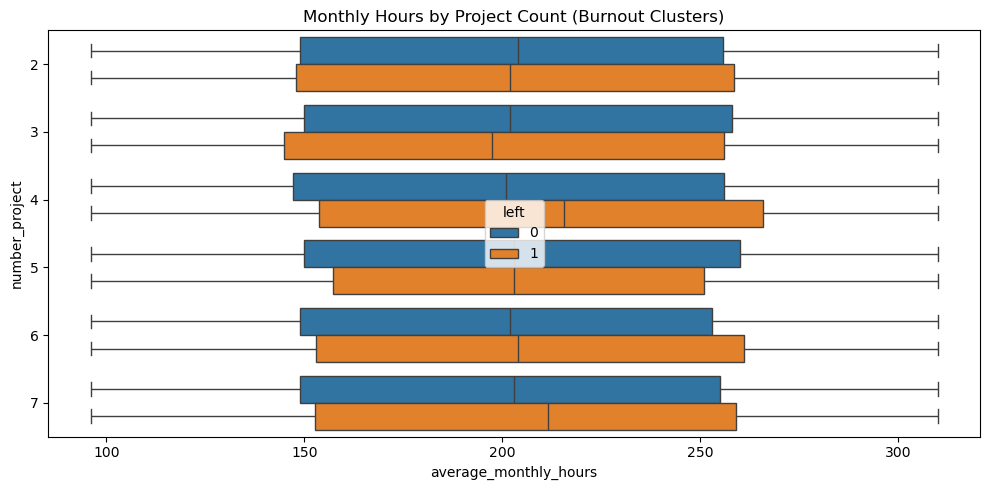

File successfully saved to data/hr_cleaned.csv


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# This checks if you are inside 'notebooks' or the root 'ASUS' folder
if os.path.basename(os.getcwd()) == 'notebooks':
    path = '../data/hr_dataset.csv'
else:
    path = 'data/hr_dataset.csv'

# Ensure the directory exists in the current location
if not os.path.exists('data'):
    os.makedirs('data')

# Loading and Cleaning
df = pd.read_csv(path)
df = df.rename(columns={'average_montly_hours': 'average_monthly_hours', 'time_spend_company': 'tenure', 'Work_accident': 'work_accident', 'Department': 'department'})
df = df.drop_duplicates().reset_index(drop=True)

# Visualizing Burnout Patterns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='average_monthly_hours', y='number_project', hue='left', orient="h")
plt.title('Monthly Hours by Project Count (Burnout Clusters)')
plt.tight_layout()
plt.savefig('Monthly_Hours_by_Project_Count.png')
plt.show()

# Saving the file
df.to_csv('data/hr_cleaned.csv', index=False)
print("File successfully saved to data/hr_cleaned.csv")

Data loaded successfully. Shape: (14999, 10)
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2282
           1       1.00      0.00      0.00       718

    accuracy                           0.76      3000
   macro avg       0.88      0.50      0.43      3000
weighted avg       0.82      0.76      0.66      3000



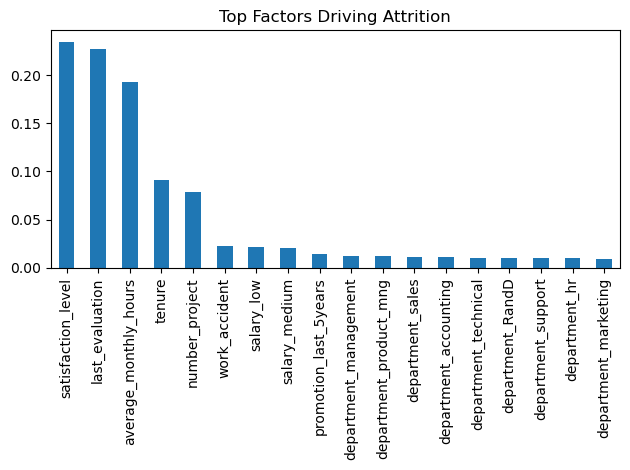

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Loading Cleaned Data
df = pd.read_csv('data/hr_cleaned.csv')
df_encoded = pd.get_dummies(df, columns=['salary', 'department'], drop_first=True)

df_encoded = pd.get_dummies(df, columns=['salary', 'department'], drop_first=True)

X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

print("Data loaded successfully. Shape:", df.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Building and Evaluating Random Forest
rf = RandomForestClassifier(max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plotting Feature Importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.plot.bar(title='Top Factors Driving Attrition')
plt.tight_layout()
plt.savefig('Top_Factors_Driving_Attrition.png')

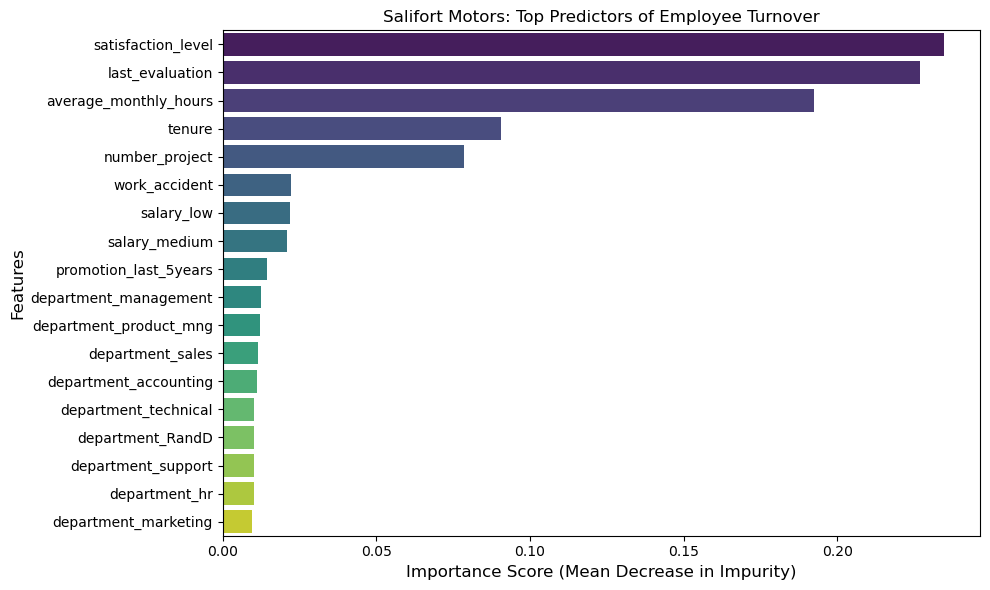

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    model_to_use = rf_cv.best_estimator_
except NameError:
    model_to_use = rf # Fallback to the basic 'rf' variable

# 2. Extracting feature importances
importances = model_to_use.feature_importances_

# Getting the feature names from training data
feature_names = X_train.columns

# 3. Creating a DataFrame for visualization
# This makes it easier to sort and plot
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# 4. Creating the Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=forest_importances.values, 
    y=forest_importances.index, 
    hue=forest_importances.index, 
    palette='viridis', 
    legend=False
)

# 5. Adding labels and title for professionalism
plt.title('Salifort Motors: Top Predictors of Employee Turnover')
plt.xlabel('Importance Score (Mean Decrease in Impurity)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Saving the plot for report
plt.tight_layout()
plt.savefig('feature_importance_plot.png')
plt.show()